In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/스타2/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/스타2/test.csv')

In [2]:
train.head()

,game_id,winner,time,player,species,event,event_contents
0,0,1,0.00,0,T,Camera,"at (145.25, 21.5078125)"
1,0,1,0.00,1,T,Camera,"at (22.75, 147.0078125)"
2,0,1,0.02,0,T,Selection,['OrbitalCommand [3080001]']
3,0,1,0.02,0,T,Ability,(1360) - TrainSCV
4,0,1,0.14,0,T,Camera,"at (142.99609375, 24.50390625)"


In [3]:
test.head()

,game_id,time,player,species,event,event_contents
0,38872,0.00,0,P,Camera,"at (22.25, 81.5078125)"
1,38872,0.00,1,P,Camera,"at (120.25, 153.83984375)"
2,38872,0.01,1,P,Selection,['Nexus [3100001]']
3,38872,0.01,1,P,Ability,(15E0) - TrainProbe
4,38872,0.01,1,P,AddToControlGroup,NaN


게임 한 개에서 두 개 정도의 로그를 살펴보자.

In [50]:
train[train['game_id'] ==0][['time','player','species','event','event_contents']].head()

,time,player,species,event,event_contents
0,0.00,0,T,Camera,"at (145.25, 21.5078125)"
1,0.00,1,T,Camera,"at (22.75, 147.0078125)"
2,0.02,0,T,Selection,['OrbitalCommand [3080001]']
3,0.02,0,T,Ability,(1360) - TrainSCV
4,0.14,0,T,Camera,"at (142.99609375, 24.50390625)"


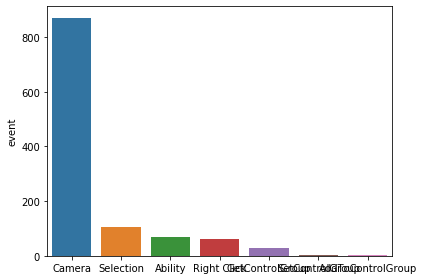

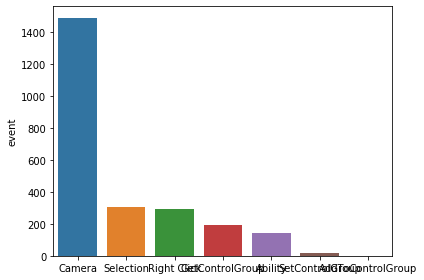

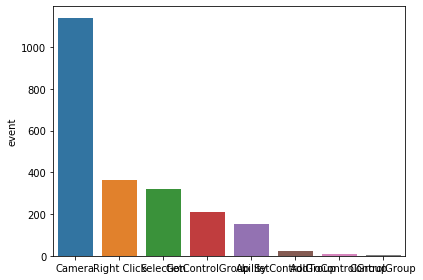

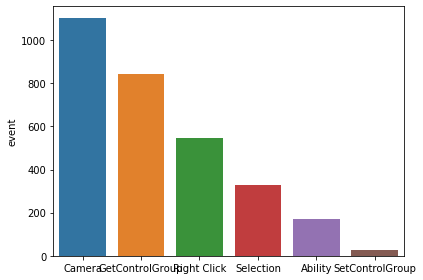

In [46]:
for num in range(0,4):
  sns.barplot(train[train['game_id'] ==num]['event'].value_counts().index,
              train[train['game_id'] ==num]['event'].value_counts())
  plt.tight_layout()
  plt.show()

Camera는 항상 높은 비율로 event를 구성한다. 또한 2등으로 나오는 event 속성에 대해서도 연구할 필요가 있을 것 같음.

우선 Camera를 기준으로 EDA를 시작해 보자.

# Event의 Camera
1. Camera의 첫 위치가 자신의 진영이라고 가정을 하면 내 카메라가 적 진영 위치로 많이 가 있으면 승리에 가까운 것이라고 생각하면 어떨까?

In [66]:
train[(train['game_id'] ==1000)&(train['event']=='Camera')]

,game_id,winner,time,player,species,event,event_contents
1708008,1000,0,0.00,1,Z,Camera,"at (22.75, 147.0078125)"
1708009,1000,0,0.00,0,Z,Camera,"at (145.25, 21.5078125)"
1708027,1000,0,0.04,1,Z,Camera,"at (148.0, 62.4921875)"
1708031,1000,0,0.06,1,Z,Camera,"at (24.5, 145.7578125)"
1708033,1000,0,0.07,0,Z,Camera,"at (144.3046875, 21.5078125)"
...,...,...,...,...,...,...,...
1709930,1000,0,8.10,1,Z,Camera,"at (24.5, 122.2578125)"
1709939,1000,0,8.11,1,Z,Camera,"at (26.109375, 122.2578125)"
1709940,1000,0,8.11,1,Z,Camera,"at (27.3203125, 122.2578125)"
1709941,1000,0,8.12,1,Z,Camera,"at (34.17578125, 115.40234375)"


In [63]:
train[train['player']==train['winner']]['event'].value_counts()

Camera               15742425
Right Click           5925032
GetControlGroup       5468415
Selection             4898234
Ability               1965104
SetControlGroup        179789
AddToControlGroup       78515
ControlGroup            16249
Name: event, dtype: int64

In [64]:
train[train['player']!=train['winner']]['event'].value_counts()

Camera               15886982
Right Click           5640845
Selection             4627925
GetControlGroup       4582765
Ability               1833286
SetControlGroup        160915
AddToControlGroup       70825
ControlGroup            14470
Name: event, dtype: int64

승자나 패자나 크게 event 비율에 차이를 보이진 않음.

위도 따로, 경도 따로 위치 변화를 구해 더해준 다음 수치를 비교해 보자.

In [0]:
# toy data 만들기
toy_data  = train[train['game_id']<=100]

In [120]:
toy_data['new_event']=toy_data.loc[toy_data['event']=='Camera','event_contents'].apply(lambda x: x.lstrip('at ('))
toy_data['new_event']=toy_data.loc[toy_data['event']=='Camera','new_event'].apply(lambda x: x.rstrip(')'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [121]:
toy_data.head()

,game_id,winner,time,player,species,event,event_contents,new_event
0,0,1,0.00,0,T,Camera,"at (145.25, 21.5078125)","145.25, 21.5078125"
1,0,1,0.00,1,T,Camera,"at (22.75, 147.0078125)","22.75, 147.0078125"
2,0,1,0.02,0,T,Selection,['OrbitalCommand [3080001]'],NaN
3,0,1,0.02,0,T,Ability,(1360) - TrainSCV,NaN
4,0,1,0.14,0,T,Camera,"at (142.99609375, 24.50390625)","142.99609375, 24.50390625"


In [122]:
# event == Camera만 남겨두고 모든 행은 없애도록 하자.
toy_data = toy_data[toy_data['event']=='Camera']
toy_data

,game_id,winner,time,player,species,event,event_contents,new_event
0,0,1,0.00,0,T,Camera,"at (145.25, 21.5078125)","145.25, 21.5078125"
1,0,1,0.00,1,T,Camera,"at (22.75, 147.0078125)","22.75, 147.0078125"
4,0,1,0.14,0,T,Camera,"at (142.99609375, 24.50390625)","142.99609375, 24.50390625"
5,0,1,0.14,0,T,Camera,"at (142.5078125, 24.98828125)","142.5078125, 24.98828125"
6,0,1,0.14,0,T,Camera,"at (139.6171875, 27.8828125)","139.6171875, 27.8828125"
...,...,...,...,...,...,...,...,...
159172,100,1,8.05,1,P,Camera,"at (37.68359375, 36.828125)","37.68359375, 36.828125"
159173,100,1,8.05,1,P,Camera,"at (37.68359375, 35.546875)","37.68359375, 35.546875"
159174,100,1,8.05,1,P,Camera,"at (37.68359375, 34.26953125)","37.68359375, 34.26953125"
159175,100,1,8.06,1,P,Camera,"at (37.68359375, 32.14453125)","37.68359375, 32.14453125"


In [139]:
toy_data['new_event']=toy_data['new_event'].apply(lambda x: x.split(','))
toy_data.head()

,game_id,winner,time,player,species,event,event_contents,new_event
0,0,1,0.00,0,T,Camera,"at (145.25, 21.5078125)","[145.25, 21.5078125]"
1,0,1,0.00,1,T,Camera,"at (22.75, 147.0078125)","[22.75, 147.0078125]"
4,0,1,0.14,0,T,Camera,"at (142.99609375, 24.50390625)","[142.99609375, 24.50390625]"
5,0,1,0.14,0,T,Camera,"at (142.5078125, 24.98828125)","[142.5078125, 24.98828125]"
6,0,1,0.14,0,T,Camera,"at (139.6171875, 27.8828125)","[139.6171875, 27.8828125]"


In [0]:
toy_data['x_axis']=toy_data['new_event'].apply(lambda x: float(x[0]))
toy_data['y_axis']=toy_data['new_event'].apply(lambda x: float(x[1]))

toy_data.drop(['event_contents','new_event'],axis=1,inplace=True)

In [158]:
toy_data.head()

,game_id,winner,time,player,species,event,x_axis,y_axis
0,0,1,0.00,0,T,Camera,145.250000,21.507812
1,0,1,0.00,1,T,Camera,22.750000,147.007812
4,0,1,0.14,0,T,Camera,142.996094,24.503906
5,0,1,0.14,0,T,Camera,142.507812,24.988281
6,0,1,0.14,0,T,Camera,139.617188,27.882812
